<a href="https://colab.research.google.com/github/okzeesh/CS-351-AI-Lab-Github-repository-2022644/blob/main/LAB3_Word_Search_Puzzle_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Word Search Puzzle Generator

This Python project generates a random word search puzzle based on a list of generated words. The words are placed in a grid, and the puzzle can be displayed both in text form and graphically using `matplotlib`.

## Features
- Generates a grid with randomly placed words.
- Supports circular and square-shaped masking to create unique puzzles.
- Option to allow or disallow backward word placement.
- Displays the puzzle grid with placed words using `matplotlib`.
- Provides positions and directions of the placed words in the grid.

## Requirements
- Python 3.x
- Required libraries:
  - `matplotlib`

You can install the required library using:

pip install matplotlib


## How It Works
1. A grid of size `nrows x ncols` is created.
2. A list of random words is generated.
3. Words are placed in the grid using different orientations (horizontal, vertical, diagonal).
4. The grid can be displayed in both textual and graphical form.

## Code Explanation
### Main Functions
- `make_grid(mask)`: Generates the grid with an optional mask (`circle`, `squares`, or `none`).
- `generate_random_wordlist()`: Creates a list of random words.
- `_make_wordsearch()`: Attempts to place words on the grid using the specified parameters.
- `make_wordsearch()`: Makes multiple attempts to fit all words into the grid.
- `plot_wordsearch(grid, placed_words)`: Uses `matplotlib` to visualize the grid with the placed words.
- `show_wordsearch_with_words(grid, wordlist, placed_words)`: Displays the grid and the list of words with their positions and directions.

## Usage
1. Run the script:
   ```bash
   python your_script.py
   ```
2. The program generates a grid of words and displays the puzzle in a graphical window using `matplotlib`.
3. The terminal output shows the list of words with their respective starting positions and directions.

### Customization
- Adjust the grid size by modifying the `nrows` and `ncols` variables.
- Change the number of words, as well as their minimum and maximum lengths by updating `NUM_RANDOM_WORDS`, `MIN_WORD_LENGTH`, and `MAX_WORD_LENGTH`.
- You can enable or disable backward word placement by setting `allow_backwards_words` to `True` or `False`.
- Use masks (`'circle'`, `'squares'`) by modifying the `mask` variable.

### Example Output
#### Text Output
```
Word Search Grid:
E B R A N D O M C W L P X N O E G
L E W L D W D F K C I S E T Q L M
...

Words to Find with Positions:
BRANDON starts at (1, 3), Direction: Horizontal
EXAMPLE starts at (5, 10), Direction: Diagonal
```

#### Graphical Output
The `matplotlib` visualization shows the word search grid with the words highlighted in red.

## Notes
- You can modify or extend the masking functions (`circle_mask`, `squares_mask`) to create other custom shapes.
- Ensure that `matplotlib` is installed to view the graphical output.

## License
This project is open-source and free to use.

```

Feel free to adapt the `README.md` as per your needs or if you add additional features.

Fitted the words in 1 attempt(s)


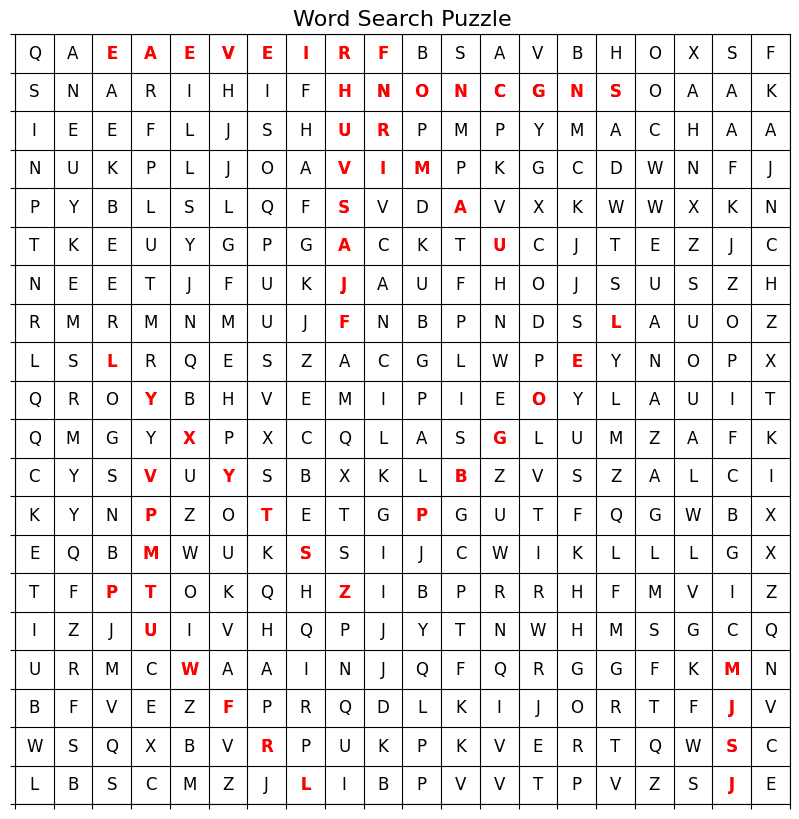

Word Search Grid:
Q A E A E V E I R F B S A V B H O X S F
S N A R I H I F H N O N C G N S O A A K
I E E F L J S H U R P M P Y M A C H A A
N U K P L J O A V I M P K G C D W N F J
P Y B L S L Q F S V D A V X K W W X K N
T K E U Y G P G A C K T U C J T E Z J C
N E E T J F U K J A U F H O J S U S Z H
R M R M N M U J F N B P N D S L A U O Z
L S L R Q E S Z A C G L W P E Y N O P X
Q R O Y B H V E M I P I E O Y L A U I T
Q M G Y X P X C Q L A S G L U M Z A F K
C Y S V U Y S B X K L B Z V S Z A L C I
K Y N P Z O T E T G P G U T F Q G W B X
E Q B M W U K S S I J C W I K L L L G X
T F P T O K Q H Z I B P R R H F M V I Z
I Z J U I V H Q P J Y T N W H M S G C Q
U R M C W A A I N J Q F Q R G G F K M N
B F V E Z F P R Q D L K I J O R T F J V
W S Q X B V R P U K P K V E R T Q W S C
L B S C M Z J L I B P V V T P V Z S J E

Words to Find with Positions:
LYXYTSZ starts at (9, 3), Direction: Diagonal
PUWFRL starts at (15, 3), Direction: Diagonal
MAU starts at (4, 11), Direction: Diagonal
VPMT starts at (

In [1]:
import os
import sys
import random
from copy import deepcopy

# Maximum number of rows and columns.
NMAX = 32
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Number of random words to generate
NUM_RANDOM_WORDS = 10

# Minimum and maximum lengths of generated random words
MIN_WORD_LENGTH = 3
MAX_WORD_LENGTH = 8

def circle_mask(grid):
    """A circular mask to shape the grid."""
    r2 = min(ncols, nrows)**2 // 4
    cx, cy = ncols // 2, nrows // 2
    for irow in range(nrows):
        for icol in range(ncols):
            if (irow - cy)**2 + (icol - cx)**2 > r2:
                grid[irow][icol] = '*'

def squares_mask(grid):
    """A mask of overlapping squares to shape the grid."""
    a = int(0.38 * min(ncols, nrows))
    cy = nrows // 2
    cx = ncols // 2
    for irow in range(nrows):
        for icol in range(ncols):
            if a <= icol < ncols-a:
                if irow < cy-a or irow > cy+a:
                    grid[irow][icol] = '*'
            if a <= irow < nrows-a:
                if icol < cx-a or icol > cx+a:
                    grid[irow][icol] = '*'

def no_mask(grid):
    """The default, no mask."""
    pass

apply_mask = {
    None: no_mask,
    'circle': circle_mask,
    'squares': squares_mask,
}

def make_grid(mask=None):
    """Make the grid and apply a mask (locations a letter cannot be placed)."""
    grid = [[' ']*ncols for _ in range(nrows)]
    apply_mask[mask](grid)
    return grid

def generate_random_word():
    """Generate a random word with length between MIN_WORD_LENGTH and MAX_WORD_LENGTH."""
    word_length = random.randint(MIN_WORD_LENGTH, MAX_WORD_LENGTH)
    word = ''.join(random.choice(alphabet) for _ in range(word_length))
    return word

def generate_random_wordlist():
    """Generate a list of random words."""
    return [generate_random_word() for _ in range(NUM_RANDOM_WORDS)]

def _make_wordsearch(nrows, ncols, wordlist, allow_backwards_words=True, mask=None):
    """Attempt to make a word search with the given parameters."""
    grid = make_grid(mask)
    placed_words = []  # To track placed words and their positions

    def fill_grid_randomly(grid):
        """Fill up the empty, unmasked positions with random letters."""
        for irow in range(nrows):
            for icol in range(ncols):
                if grid[irow][icol] == ' ':
                    grid[irow][icol] = random.choice(alphabet)

    def remove_mask(grid):
        """Remove the mask, for text output, by replacing with whitespace."""
        for irow in range(nrows):
            for icol in range(ncols):
                if grid[irow][icol] == '*':
                    grid[irow][icol] = ' '

    def test_candidate(irow, icol, dx, dy, word):
        """Test the candidate location (icol, irow) for word in orientation dx, dy)."""
        for j in range(len(word)):
            if grid[irow][icol] not in (' ', word[j]):
                return False
            irow += dy
            icol += dx
        return True

    def place_word(word):
        """Place word randomly in the grid and return True, if possible."""
        dxdy_choices = [(0,1), (1,0), (1,1), (1,-1)]
        random.shuffle(dxdy_choices)
        for (dx, dy) in dxdy_choices:
            if allow_backwards_words and random.choice([True, False]):
                word = word[::-1]
            n = len(word)
            colmin = 0
            colmax = ncols - n if dx else ncols - 1
            rowmin = 0 if dy >= 0 else n - 1
            rowmax = nrows - n if dy >= 0 else nrows - 1
            if colmax - colmin < 0 or rowmax - rowmin < 0:
                continue
            candidates = []
            for irow in range(rowmin, rowmax+1):
                for icol in range(colmin, colmax+1):
                    if test_candidate(irow, icol, dx, dy, word):
                        candidates.append((irow, icol))
            if not candidates:
                continue
            loc = irow, icol = random.choice(candidates)
            for j in range(n):
                grid[irow][icol] = word[j]
                irow += dy
                icol += dx
            placed_words.append((word, loc, (dx, dy)))  # Track the placed word's data
            return True
        return False

    for word in wordlist:
        word = word.replace(' ', '')
        if not place_word(word):
            return None, None

    solution = deepcopy(grid)
    fill_grid_randomly(grid)
    remove_mask(grid)
    remove_mask(solution)

    return grid, solution, placed_words

def make_wordsearch(*args, **kwargs):
    """Make a word search, attempting to fit words into the specified grid."""
    NATTEMPTS = 10
    for i in range(NATTEMPTS):
        grid, solution, placed_words = _make_wordsearch(*args, **kwargs)
        if grid:
            print('Fitted the words in {} attempt(s)'.format(i+1))
            return grid, solution, placed_words
    print('I failed to place all the words after {} attempts.'.format(NATTEMPTS))
    return None, None, None

def show_wordsearch_with_words(grid, wordlist, placed_words):
    """Display the grid and list of words along with their positions in a formatted manner."""
    # Display the wordsearch grid
    print("Word Search Grid:")
    for irow in range(nrows):
        print(' '.join(grid[irow]))

    print("\nWords to Find with Positions:")
    # Display the word list with positions
    for word, (start_row, start_col), (dx, dy) in placed_words:
        direction = 'Horizontal' if dy == 0 else ('Vertical' if dx == 0 else 'Diagonal')
        print(f"{word} starts at ({start_row+1}, {start_col+1}), Direction: {direction}")

# Automatically generate random words instead of reading from a file.
nrows, ncols = 20, 20  # You can set these values as needed
mask = None  # Optionally, set a mask ('circle', 'squares')

wordlist = generate_random_wordlist()

# This flag determines whether words can be fitted backwards into the grid
allow_backwards_words = False

grid, solution, placed_words = make_wordsearch(nrows, ncols, wordlist, allow_backwards_words, mask)

import matplotlib.pyplot as plt

def plot_wordsearch(grid, placed_words):
    """Plot the word search grid and highlight the placed words."""
    fig, ax = plt.subplots(figsize=(10, 10))

    # Display the grid
    ax.set_xlim(0, ncols)
    ax.set_ylim(0, nrows)
    ax.set_xticks(range(ncols + 1))
    ax.set_yticks(range(nrows + 1))
    ax.invert_yaxis()  # Invert y-axis to have (0,0) at the top-left corner
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, color='black')

    # Fill in the letters from the grid
    for i in range(nrows):
        for j in range(ncols):
            ax.text(j + 0.5, i + 0.5, grid[i][j], va='center', ha='center', fontsize=12, color='black')

    # Highlight the placed words
    for word, (start_row, start_col), (dx, dy) in placed_words:
        x = start_col + 0.5
        y = start_row + 0.5
        for char in word:
            ax.text(x, y, char, va='center', ha='center', fontsize=12, color='red', fontweight='bold')
            x += dx
            y += dy

    # Display the plot
    plt.title("Word Search Puzzle", fontsize=16)
    plt.show()

# Plot the wordsearch grid with the placed words
if grid:
    plot_wordsearch(grid, placed_words)

if grid:
    show_wordsearch_with_words(grid, wordlist, placed_words)
